## Import Libraries

In [2]:
import UNet_Training as train
import UNet_Inference as inference
import torch
import torchio as tio
import os
import glob
import random
import numpy as np
import monai
import matplotlib.pyplot as plt

## Filter out problematic images

In [58]:
source_dir = "D:\\THROMBMICS-ALARMS_20240531\\SWI"
problem_dir = "D:\\THROMBMICS-ALARMS_20240531\\Problem_Images\\SWI"
prev = []
for file in os.listdir(source_dir):
    number = file.split("_")[1:2]
    # if file.split("_")[-1] == "ph.nii.gz":
    #     ph_q = True
    # else:
    #     ph_q = False
    if (number == prev):
        print(number)
        #os.rename(os.path.join(source_dir, file), os.path.join(problem_dir, file))
    prev = number

['06-10664-D0MR']
['09-10683-D0MR']
['09-10890-D0MR']
['16-10232-D0MR']
['21-10049-D0MR']
['21-10049-D0MR']


In [14]:
source_dir = "D:\\THROMBMICS-ALARMS_20240531\\TOF3D"
problem_dir = "D:\\THROMBMICS-ALARMS_20240531\\Problem_Images\\TOF3D"
prev = []
for file in os.listdir(source_dir):
    number = file.split("_")[1:2]
    if "_".join(file.split("_")[-2:]) == "Eq_1.nii.gz":
        eq1_q = True
    else:
        eq1_q = False
    if (number == prev) & (eq1_q):
        os.rename(os.path.join(source_dir, file), os.path.join(problem_dir, file))
    prev = number

In [42]:
swi_dir = "D:\\THROMBMICS-ALARMS_20240531\\SWI"
mask_dir = "D:\\THROMBMICS-ALARMS_20240531\\MASK"

swi_numbers = [file.split("_")[1:2][0] for file in os.listdir(swi_dir)]
mask_numbers = [file.split("_")[1:2][0] for file in os.listdir(mask_dir)]

diff = set(mask_numbers) - set(swi_numbers)

print(diff)

{'16-10170-D0MR', '02-10871-D0MR', '07-10333-D0MR', '14-10034-D0MR', '21-10163-D0MR', '21-10135-D0MR', '18-10428-D0MR', '01-10221-D0MR', '14-10119-D0MR', '14-10239-D0MR', '06-10750-D0MR', '05-10410-D0MR', '30-10034-D0MR', '18-10183-D0MR', '14-10164-D0MR', '30-10085-D0MR', '06-10487-D0MR', '14-10269-D0MR', '14-10115-D0MR', '18-10542-D0MR', '18-10099-D0MR', '06-10516-D0MR', '09-10890-D0MR', '21-10158-D0MR', '02-10874-D0MR', '30-10091-D0MR', '16-10168-D0MR', '30-10092-D0MR', '30-10090-D0MR', '06-10778-D0MR', '14-10156-D0MR', '02-10555-D0MR', '17-10120-D0MR', '16-10025-D0MR', '14-10172-D0MR', '02-10878-D0MR', '14-10068-D0MR', '06-10769-D0MR', '02-10722-D0MR', '14-10153-D0MR', '14-10238-D0MR', '30-10082-D0MR', '30-10083-D0MR', '07-10335-D0MR', '14-10120-D0MR', '30-10076-D0MR', '18-10396-D0MR', '14-10123-D0MR', '18-10206-D0MR', '14-10173-D0MR', '14-10087-D0MR', '21-10049-D0MR', '30-10088-D0MR', '14-10166-D0MR', '04-10442-D0MR', '14-10125-D0MR', '30-10094-D0MR', '14-10243-D0MR', '09-10674-D0M

In [57]:
source_dir = "E:\\Data_ETIS\\THROMBMICS-ALARMS_20240531"
target_dir = "E:\\Data_ETIS\\Temp"

for number in list(diff):
    for directory in glob.glob(os.path.join(source_dir, "2018-104_"+ number, "T2star_*")):
        for nii_file in os.listdir(directory):
            os.rename(os.path.join(directory, nii_file), os.path.join(target_dir, nii_file))
            print("Processed "+ nii_file)

Processed 2018-104_16-10170-D0MR_22_AX_T2_EG.nii.gz
Processed 2018-104_02-10871-D0MR_6_Ax_T2_GRE.nii.gz
Processed 2018-104_07-10333-D0MR_20_SWI_Images.nii.gz
Processed 2018-104_14-10034-D0MR_5_Ax_T2_.nii.gz
Processed 2018-104_21-10163-D0MR_401_cs_T2_FFE.nii.gz
Processed 2018-104_21-10135-D0MR_5_Ax_T2_.nii.gz
Processed 2018-104_18-10428-D0MR_11_T2_EG_AX.nii.gz
Processed 2018-104_01-10221-D0MR_11_SWI_Images.nii.gz
Processed 2018-104_14-10119-D0MR_16_T2_EG_AX.nii.gz
Processed 2018-104_14-10239-D0MR_5_Ax_T2_GRE_rapide.nii.gz
Processed 2018-104_06-10750-D0MR_8_AX_T2_EG_STD.nii.gz
Processed 2018-104_05-10410-D0MR_12_t2_fl2d_tra_4mm_hemo_te_25.nii.gz
Processed 2018-104_30-10034-D0MR_8_t2_fl2d_ax.nii.gz
Processed 2018-104_18-10183-D0MR_12_T2_EG_AX.nii.gz
Processed 2018-104_14-10164-D0MR_5_Ax_T2_GRE_rapide.nii.gz
Processed 2018-104_30-10085-D0MR_11_SWI_Images.nii.gz
Processed 2018-104_06-10487-D0MR_9_AX_T2_EG_STD.nii.gz
Processed 2018-104_14-10269-D0MR_16_AX_T2_.nii.gz
Processed 2018-104_14-101

## Separate Test Batch of Images

In [26]:
thrombus_mask_train_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
thrombus_mask_test_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
thrombus_mask_val_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
foreground_mask_train_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Foreground_Train"
foreground_mask_test_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Foreground_Test"
foreground_mask_val_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Foreground_Val"
swi_train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
swi_test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
swi_val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
tof_train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\TOF3D_Train"
tof_test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\TOF3D_Test"
tof_val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\TOF3D_Val"

In [27]:
def separate_image_batch(thrombus_mask_source, thrombus_mask_destination, foreground_mask_source, foreground_mask_destination, swi_source, swi_destination, tof_source, tof_destination, batch_size, seed_value=777):
    # Separate four source folders, thrombus mask(labels) , brain foreground masks with thrombus, swi images, tof images into four other destination folders (e.g. validation or test),
    # sending the specified number of images selected randomly.
    random.seed(seed_value)
    batch_indexes = random.sample(range(len(os.listdir(thrombus_mask_source))), batch_size)

    thrombus_mask_file_list = [os.listdir(thrombus_mask_source)[index] for index in batch_indexes]
    for file in thrombus_mask_file_list:
        os.rename(os.path.join(thrombus_mask_source, file), os.path.join(thrombus_mask_destination, file))

    foreground_mask_file_list = [os.listdir(foreground_mask_source)[index] for index in batch_indexes]
    for file in foreground_mask_file_list:
        os.rename(os.path.join(foreground_mask_source, file), os.path.join(foreground_mask_destination, file))
    
    swi_file_list = [os.listdir(swi_source)[index] for index in batch_indexes]
    for file in swi_file_list:
        os.rename(os.path.join(swi_source, file), os.path.join(swi_destination, file))

    tof_file_list = [os.listdir(tof_source)[index] for index in batch_indexes]
    for file in tof_file_list:
        os.rename(os.path.join(tof_source, file), os.path.join(tof_destination, file))

Separate test.

In [28]:
separate_image_batch(thrombus_mask_train_dir, thrombus_mask_test_dir, foreground_mask_train_dir, foreground_mask_test_dir, swi_train_dir, swi_test_dir, tof_train_dir, tof_test_dir, 100, seed_value=777)

Separate validation.

In [29]:
separate_image_batch(thrombus_mask_train_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_val_dir, swi_train_dir, swi_val_dir, tof_train_dir, tof_val_dir, 181, seed_value=777)

Clear out the training folders.

In [4]:
def clean_training_folders(thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir):
    # Remove files from training, validation and test folders of labels, foreground masks, swi images and tof images.
    folder_list = [thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir]
    for folders in folder_list:
        for file in os.listdir(folders):
            os.remove(os.path.join(folders, file))

In [5]:
clean_training_folders(thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir)

Fill training folders from processed images folder

In [8]:
def fill_training_folders(source_dir, thrombus_mask_train_dir, swi_train_dir, tof_train_dir):
    # Send images from a source folder containing MASK, SWI and TOF3D folders to the training folders.
    for folders in os.listdir(source_dir):
        if (folders.split("_")[0] == "MASK") | (folders == "MASK"):
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(thrombus_mask_train_dir,files))
        elif folders.split("_")[0] == "SWI":
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(swi_train_dir,files))
        elif folders.split("_")[0] == "TOF3D":
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(tof_train_dir,files))

In [13]:
source_dir = "D:\\data_ETIS_781\\Resized"

fill_training_folders(source_dir, thrombus_mask_train_dir, swi_train_dir, tof_train_dir)

## 3D Segmentation Training

### Use the SubjectsDataset class from torchio

In [2]:
train_swi_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
train_tof_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\TOF3D_Train"
train_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
train_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\MASK_Foreground_Train"
val_swi_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
val_tof_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\TOF3D_Val"
val_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
val_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Foreground_Val"
test_swi_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
test_tof_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\TOF3D_Test"
test_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
test_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Foreground_Test"

In [3]:
train_dataset = train.load_subjectsdataset_1channel(train_swi_dir, train_label_dir, train_foreground_label_dir)
val_dataset = train.load_subjectsdataset_1channel(val_swi_dir, val_label_dir, val_foreground_label_dir)

In [3]:
train_dataset = train.load_subjectsdataset_2channel(train_swi_dir, train_tof_dir, train_label_dir, train_foreground_label_dir)
val_dataset = train.load_subjectsdataset_2channel(val_swi_dir, val_tof_dir, val_label_dir, val_foreground_label_dir)

### Setup Sampler

In [4]:
train_sampler = tio.data.LabelSampler(patch_size=(145,145,18), label_name="foreground_label", label_probabilities={0: 0, 1: 0.8, 2: 0.2})

In [5]:
queue_length = 2500
samples_per_volume = 25

train_patches_queue = tio.Queue(train_dataset, queue_length, samples_per_volume, train_sampler, num_workers=0)
val_patches_queue = tio.Queue(val_dataset, queue_length, samples_per_volume, train_sampler, num_workers=0)

train_patches_loader = tio.SubjectsLoader(train_patches_queue, batch_size=5, num_workers=0)
val_patches_loader = tio.SubjectsLoader(val_patches_queue, batch_size=5, num_workers=0)

In [6]:
tio.Queue.get_max_memory_pretty(train_patches_queue)

'14.1 GiB'

### Training Loop

In [7]:
model = monai.networks.nets.BasicUNetPlusPlus(spatial_dims=3, in_channels=2, out_channels=1, features=(32,32,64,128,256,32))

BasicUNetPlusPlus features: (32, 32, 64, 128, 256, 32).


In [8]:
focal_loss = monai.losses.FocalLoss(gamma=8, alpha=0.75)

In [9]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training Epoch 0/12:   0%|          | 0/2905 [00:00<?, ?it/s]c:\Users\wijflo\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\torchio\data\image.py:251: UserWarning: Using TorchIO images without a torchio.SubjectsLoader in PyTorch >= 2.3 might have unexpected consequences, e.g., the collated batches will be instances of torchio.Subject with 5D images. Replace your PyTorch DataLoader with a torchio.SubjectsLoader so that the collated batch becomes a dictionary, as expected. See https://github.com/fepegar/torchio/issues/1179 for more context about this issue.
  warnings.warn(message, stacklevel=1)
Training Epoch 0/12: 100%|██████████| 2905/2905 [56:17<00:00,  1.16s/it]   


Epoch 0/12, Training Loss: 0.00001331


Validating Epoch 0/12: 100%|██████████| 500/500 [04:58<00:00,  1.68it/s]  

Epoch 0/12, Validation Loss: 0.00000582


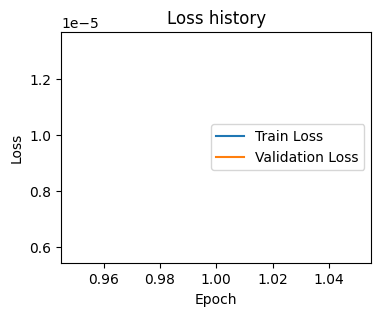

Training Epoch 1/12: 100%|██████████| 2905/2905 [56:47<00:00,  1.17s/it]   


Epoch 1/12, Training Loss: 0.00000645


Validating Epoch 1/12: 100%|██████████| 500/500 [05:00<00:00,  1.66it/s]  

Epoch 1/12, Validation Loss: 0.00000467


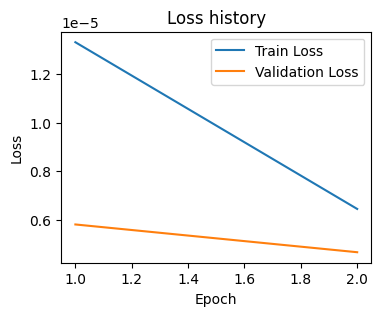

Training Epoch 2/12: 100%|██████████| 2905/2905 [56:32<00:00,  1.17s/it]   


Epoch 2/12, Training Loss: 0.00000544


Validating Epoch 2/12: 100%|██████████| 500/500 [05:00<00:00,  1.67it/s]  

Epoch 2/12, Validation Loss: 0.00000782


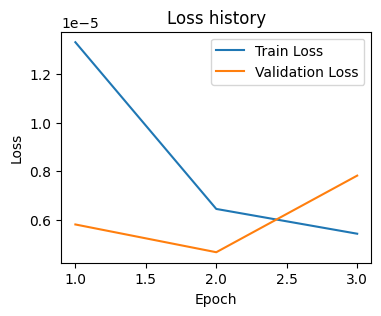

Training Epoch 3/12: 100%|██████████| 2905/2905 [56:43<00:00,  1.17s/it]   


Epoch 3/12, Training Loss: 0.00000400


Validating Epoch 3/12: 100%|██████████| 500/500 [05:00<00:00,  1.66it/s]  

Epoch 3/12, Validation Loss: 0.00000368


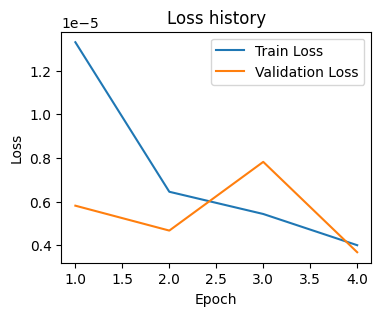

Training Epoch 4/12: 100%|██████████| 2905/2905 [56:42<00:00,  1.17s/it]   


Epoch 4/12, Training Loss: 0.00000440


Validating Epoch 4/12: 100%|██████████| 500/500 [05:01<00:00,  1.66it/s]  

Epoch 4/12, Validation Loss: 0.00000367


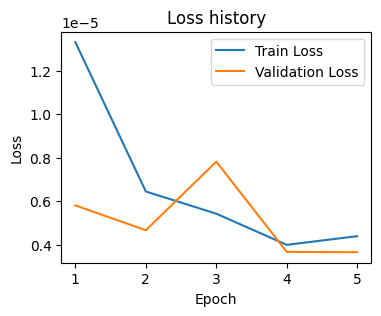

Training Epoch 5/12: 100%|██████████| 2905/2905 [56:50<00:00,  1.17s/it]   


Epoch 5/12, Training Loss: 0.00000326


Validating Epoch 5/12: 100%|██████████| 500/500 [05:02<00:00,  1.65it/s]  

Epoch 5/12, Validation Loss: 0.00000344


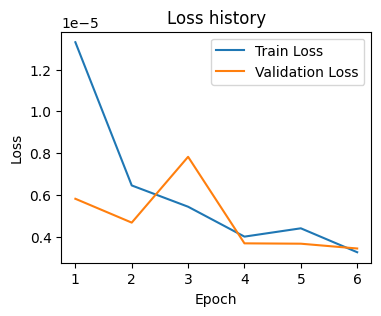

Training Epoch 6/12: 100%|██████████| 2905/2905 [56:49<00:00,  1.17s/it]   


Epoch 6/12, Training Loss: 0.00000412


Validating Epoch 6/12: 100%|██████████| 500/500 [05:02<00:00,  1.65it/s]  

Epoch 6/12, Validation Loss: 0.00000428


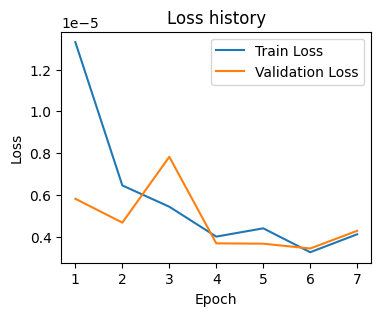

Training Epoch 7/12: 100%|██████████| 2905/2905 [56:44<00:00,  1.17s/it]   


Epoch 7/12, Training Loss: 0.00000304


Validating Epoch 7/12: 100%|██████████| 500/500 [04:58<00:00,  1.67it/s]  

Epoch 7/12, Validation Loss: 0.00000412


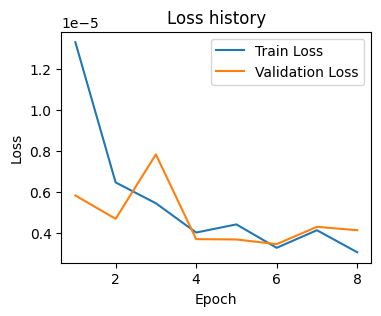

Training Epoch 8/12: 100%|██████████| 2905/2905 [56:48<00:00,  1.17s/it]   


Epoch 8/12, Training Loss: 0.00000274


Validating Epoch 8/12: 100%|██████████| 500/500 [05:00<00:00,  1.66it/s]  

Epoch 8/12, Validation Loss: 0.00000254


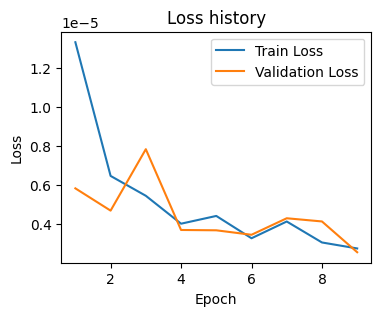

Training Epoch 9/12: 100%|██████████| 2905/2905 [56:52<00:00,  1.17s/it]   


Epoch 9/12, Training Loss: 0.00000254


Validating Epoch 9/12: 100%|██████████| 500/500 [05:04<00:00,  1.64it/s]  

Epoch 9/12, Validation Loss: 0.00000346


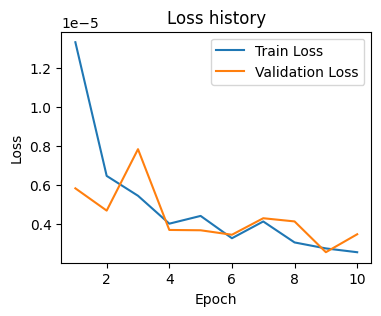

Training Epoch 10/12: 100%|██████████| 2905/2905 [56:51<00:00,  1.17s/it]   


Epoch 10/12, Training Loss: 0.00000209


Validating Epoch 10/12: 100%|██████████| 500/500 [05:03<00:00,  1.65it/s]  

Epoch 10/12, Validation Loss: 0.00000303


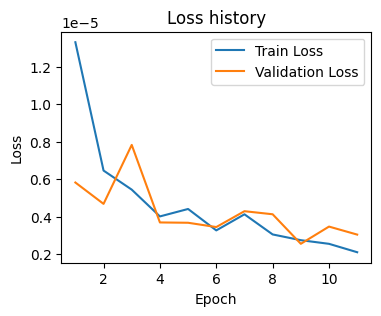

Training Epoch 11/12: 100%|██████████| 2905/2905 [56:52<00:00,  1.17s/it]   


Epoch 11/12, Training Loss: 0.00000224


Validating Epoch 11/12: 100%|██████████| 500/500 [04:59<00:00,  1.67it/s]  

Epoch 11/12, Validation Loss: 0.00000370


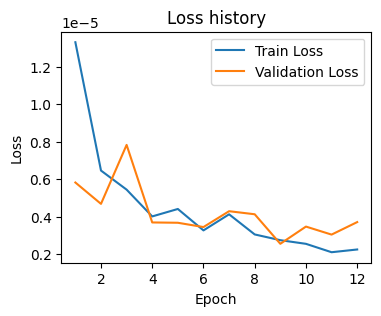

Training Epoch 12/12: 100%|██████████| 2905/2905 [56:38<00:00,  1.17s/it]   


Epoch 12/12, Training Loss: 0.00000209


Validating Epoch 12/12: 100%|██████████| 500/500 [05:04<00:00,  1.64it/s]  

Epoch 12/12, Validation Loss: 0.00000368


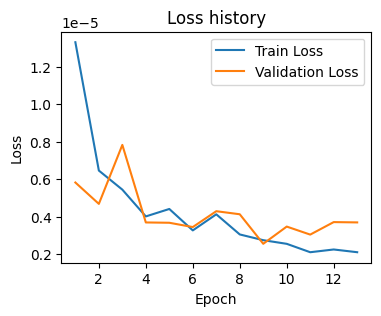

In [11]:
checkpoint_location = "D:\\data_ETIS_781\\Training\\Checkpoints\\model\\SWI_TOF3D_2channel\\581x25_gamma8\\train_2ch_581x25_gamma8_checkpoint.pth"

train.train_model(model, focal_loss, optimizer, train_patches_loader, val_patches_loader, ["swi_image", "tof_image"], num_epochs=12, starting_epoch=0, load_from_checkpoint=False, save_checkpoint_flag=True, save_checkpoint_location=checkpoint_location, display_loss=True)

In [10]:
train.save_model_params ("D:\\data_ETIS_781\\Training\\Checkpoints\\model\\SWI_TOF3D_2channel\\581x25_gamma8\\model_2ch_581x25_gamma8_params.json", train_swi_dir, val_swi_dir, test_swi_dir,
                       25, (145,145,18), 2500, 3,
                       "Monai BasicUNetPlusPlus", ["SWI", "TOF3D"],
                       "Monai Focal Loss", "Adam",
                       model_notes={"features":(32,32,64,128,256,32)}, loss_notes={"gamma":8,"alpha":0.75}, optimizer_notes={"learning_rate":0.001}, training_epochs=12)

## Load model and predict

### Predict from patches

In [3]:
model_for_prediction = monai.networks.nets.BasicUNetPlusPlus(spatial_dims=3, in_channels=2, out_channels=1, features=(32,32,64,128,256,32))

BasicUNetPlusPlus features: (32, 32, 64, 128, 256, 32).


In [4]:
learning_rate = 0.01
optimizer_for_prediction = torch.optim.Adam(model_for_prediction.parameters(), lr=learning_rate)

In [5]:
checkpoint_location = "D:\\data_ETIS_781\\Training\\Checkpoints\\model\\SWI_TOF3D_2channel\\581x25_gamma8\\train_2ch_581x25_gamma8_checkpoint.pth"
model_for_prediction_checkpoint = torch.load(checkpoint_location, weights_only=False)

In [6]:
train_swi_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
train_tof_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\TOF3D_Train"
train_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
train_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\MASK_Foreground_Train"
val_swi_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
val_tof_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\TOF3D_Val"
val_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
val_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Foreground_Val"
test_swi_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
test_tof_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\TOF3D_Test"
test_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
test_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Foreground_Test"

In [ ]:
#train_dataset = load_subjectsdataset_1channel (train_dir, train_label_dir, train_foreground_label_dir)
#val_dataset = load_subjectsdataset_1channel (val_dir, val_label_dir, val_foreground_label_dir)
test_dataset = inference.load_subjectsdataset_1channel (test_swi_dir, test_label_dir, test_foreground_label_dir)

In [7]:
test_dataset = inference.load_subjectsdataset_2channel (test_swi_dir, test_tof_dir, test_label_dir, test_foreground_label_dir)

In [8]:
test_dataloader = tio.SubjectsLoader(test_dataset, batch_size=8, collate_fn=inference.pad_collate_fn, shuffle=False, num_workers=0)

In [9]:
prediction_dir_location = "D:\\data_ETIS_781\\Training\\Predictions\\Test_Predictions\\SWI_TOF3D_Predictions\\Predictions_patients581_gamma8_sigmoid05"
ground_truth_label_location = test_label_dir

logits_list = inference.run_inference(test_dataloader, model_for_prediction, optimizer_for_prediction, checkpoint_location, (145,145,18), (4, 4, 4), test_swi_dir, ["swi_image", "tof_image"], return_logits=True)
predictions_list = [inference.logit_to_binary_mask(logits, threshold=0.5) for logits in logits_list]
inference.save_predictions(predictions_list, prediction_dir_location, ground_truth_label_location)
ground_truth_masks_list = inference.load_prediction_masks(ground_truth_label_location)
dice_score_list = inference.compute_dice_metric(predictions_list, ground_truth_masks_list)
intersection_list = inference.compute_sensitivity_metric(predictions_list, ground_truth_masks_list)

c:\Users\wijflo\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\torchio\data\image.py:251: UserWarning: Using TorchIO images without a torchio.SubjectsLoader in PyTorch >= 2.3 might have unexpected consequences, e.g., the collated batches will be instances of torchio.Subject with 5D images. Replace your PyTorch DataLoader with a torchio.SubjectsLoader so that the collated batch becomes a dictionary, as expected. See https://github.com/fepegar/torchio/issues/1179 for more context about this issue.
  warnings.warn(message, stacklevel=1)
Running Inference: 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]


Folder created at D:\data_ETIS_781\Training\Predictions\Test_Predictions\SWI_TOF3D_Predictions\Predictions_patients581_gamma8_sigmoid05
Mean Dice Score is 0.20667272806167603
Mean Sensitivity is 0.4883843017904996


In [17]:
prediction_dir_location = "D:\\data_ETIS_781\\Training\\Predictions\\Test_Predictions\\SWI_TOF3D_Predictions\\Predictions_patients581_gamma8_sigmoid07"

predictions_list = [inference.logit_to_binary_mask(logits, threshold=0.7) for logits in logits_list]
inference.save_predictions(predictions_list, prediction_dir_location, ground_truth_label_location)
ground_truth_masks_list = inference.load_prediction_masks(ground_truth_label_location)
dice_score_list = inference.compute_dice_metric(predictions_list, ground_truth_masks_list)
intersection_list = inference.compute_sensitivity_metric(predictions_list, ground_truth_masks_list)

Folder created at D:\data_ETIS_781\Training\Predictions\Test_Predictions\SWI_TOF3D_Predictions\Predictions_patients581_gamma8_sigmoid07
Mean Dice Score is 4.405286017572507e-05
Mean Sensitivity is 2.207505518763797e-05


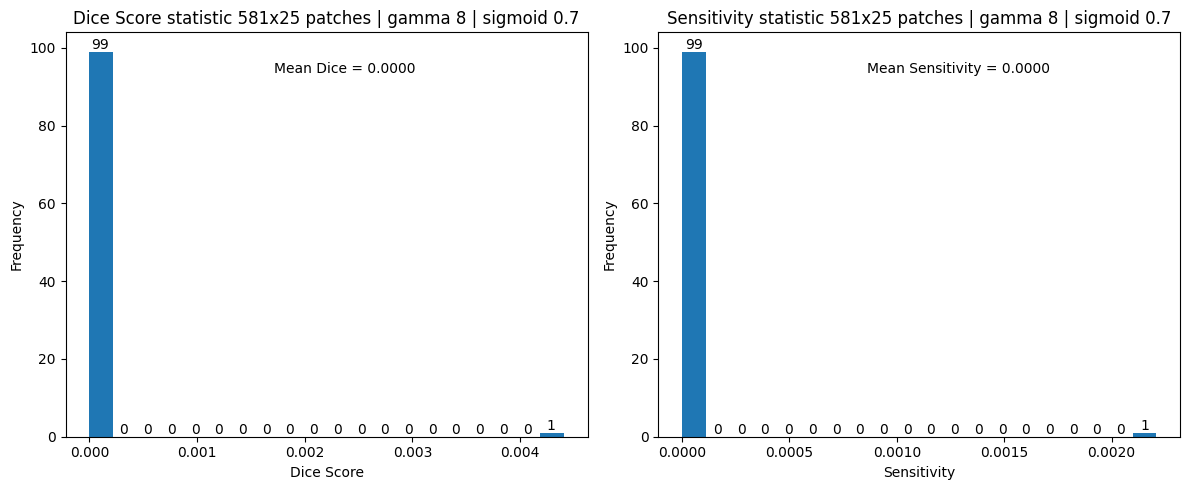

In [26]:
patches = "581x25"
gamma = 8
sigmoid = 0.7

fig, axs = plt.subplots(1,2, figsize=(12, 5))

counts_dice, bins_dice, patches_dice = axs[0].hist(np.array(dice_score_list).flatten(), bins=20)

for count, x in zip(counts_dice, bins_dice[:-1]):
    axs[0].text(x + 0.0001, count, str(int(count)), ha="center", va="bottom")

counts_inter, bins_inter, patches_inter = axs[1].hist(np.array(intersection_list).flatten(), bins=20)

for count, x in zip(counts_inter, bins_inter[:-1]):
    axs[1].text(x + 0.000055, count, str(int(count)), ha="center", va="bottom")

axs[0].text(0.4, 0.9, f"Mean Dice = {dice_score_list.mean():.4f}", transform=axs[0].transAxes)
axs[0].set_xlabel("Dice Score")
axs[0].set_ylabel("Frequency")
axs[0].set_title(f"Dice Score statistic {patches} patches | gamma {gamma} | sigmoid {sigmoid}")

axs[1].text(0.4, 0.9, f"Mean Sensitivity = {intersection_list.mean():.4f}", transform=axs[1].transAxes)
axs[1].set_xlabel("Sensitivity")
axs[1].set_ylabel("Frequency")
axs[1].set_title(f"Sensitivity statistic {patches} patches | gamma {gamma} | sigmoid {sigmoid}")

plt.tight_layout()
plt.savefig(f"D:\\data_ETIS_781\\Training\\Checkpoints\\Metrics_Results\\SWI_TOF3D\\MetricsStatistic_{patches}patches_gamma{gamma}_sigmoid0{int(10 * sigmoid)}.png")

## Testing ground